In [6]:
"""
Load the prepared train/test datasets created during DataPreparation.ipynb.

- pd.read_csv(): loads the saved split files from disk.
- squeeze(): converts a single-column DataFrame into a 1D Series (expected by scikit-learn).
"""

import pandas as pd

X_train = pd.read_csv("processed/X_train.csv")
X_test  = pd.read_csv("processed/X_test.csv")

y_train = pd.read_csv("processed/y_train.csv").squeeze()
y_test  = pd.read_csv("processed/y_test.csv").squeeze()

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6499, 116), (1625, 116), (6499,), (1625,))

In [8]:
#Importing Libraries 
import pandas as pd

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
"""
Train a Bernoulli Naïve Bayes classifier.

Why BernoulliNB?
- Bernoulli Naïve Bayes is designed for binary features (0/1), matching one-hot encoded inputs.
"""
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

nb_model


BernoulliNB()

In [20]:
"""
Generate predictions for the test set.

- predict(): returns the predicted class label for each test sample.
"""
y_pred_nb = nb_model.predict(X_test)

y_pred_nb


array(['p', 'e', 'e', ..., 'e', 'e', 'p'], dtype='<U1')

In [24]:
"""
Compute overall accuracy.

- accuracy_score(): proportion of correct predictions on the test set.
"""
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_nb


0.932923076923077

In [26]:
"""
Create a labelled confusion matrix for clearer interpretation.

Rows = actual class, Columns = predicted class
"""
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=["e", "p"])

cm_nb_df = pd.DataFrame(
    cm_nb,
    index=["Actual_e", "Actual_p"],
    columns=["Pred_e", "Pred_p"]
)

cm_nb_df


,Pred_e,Pred_p
Actual_e,829,13
Actual_p,96,687


In [36]:
"""
Generate a detailed classification report.

- precision: correctness of positive predictions
- recall: ability to find all samples of a class
- f1-score: balance of precision and recall
"""
print(classification_report(y_test, y_pred_nb, target_names=["Edible (e)", "Poisonous (p)"]))


               precision    recall  f1-score   support

   Edible (e)       0.90      0.98      0.94       842
Poisonous (p)       0.98      0.88      0.93       783

     accuracy                           0.93      1625
    macro avg       0.94      0.93      0.93      1625
 weighted avg       0.94      0.93      0.93      1625



In [38]:

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_nb  = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label="p")
recall_nb    = recall_score(y_test, y_pred_nb, pos_label="p")
f1_nb        = f1_score(y_test, y_pred_nb, pos_label="p")

roc_auc_score_nb = auc_score  
ap_score_nb      = ap_score    

metrics_nb_table = pd.DataFrame({
    "METRIC": ["ACCURACY", "PRECISION (p)", "RECALL (p)", "F1-SCORE (p)", "ROC-AUC", "AP"],
    "VALUE":  [accuracy_nb, precision_nb, recall_nb, f1_nb, roc_auc_score_nb, ap_score_nb]
})

metrics_nb_table["VALUE"] = metrics_nb_table["VALUE"].round(4)
metrics_nb_table


,METRIC,VALUE
0,ACCURACY,0.9329
1,PRECISION (p),0.9814
2,RECALL (p),0.8774
3,F1-SCORE (p),0.9265
4,ROC-AUC,0.9954
5,AP,0.9952


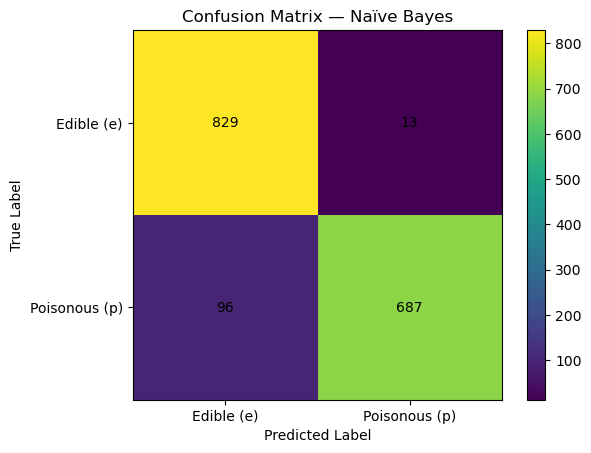

In [30]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

cm = confusion_matrix(y_test, y_pred_nb, labels=["e", "p"])

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation="nearest")
ax.set_title("Confusion Matrix — Naïve Bayes")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Edible (e)", "Poisonous (p)"])
ax.set_yticklabels(["Edible (e)", "Poisonous (p)"])
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Add counts on the heatmap cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")

fig.colorbar(im, ax=ax)
plt.show()

# Probability scores for curves (positive class = 'p') 
# BernoulliNB supports predict_proba(), which we use for ROC and PR curves.
proba = nb_model.predict_proba(X_test)

# Identify the column index for class 'p'
p_index = list(nb_model.classes_).index("p")
y_score = proba[:, p_index]


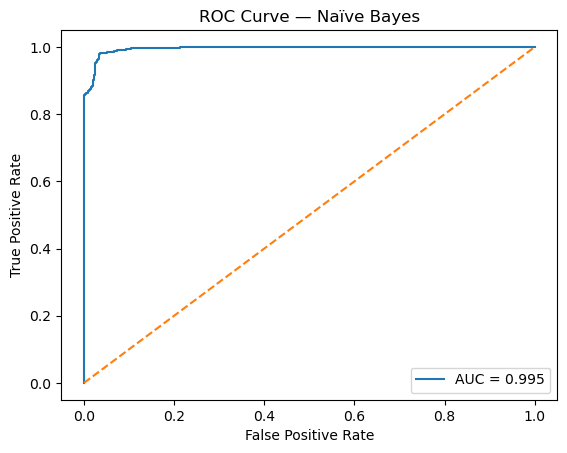

In [32]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label="p")
auc_score = roc_auc_score((y_test == "p").astype(int), y_score)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve — Naïve Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

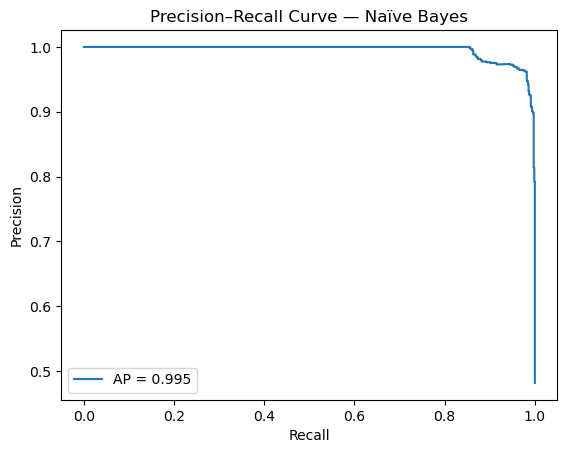

In [34]:
#Precision–Recall Curve 
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label="p")
ap_score = average_precision_score((y_test == "p").astype(int), y_score)

plt.figure()
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.title("Precision–Recall Curve — Naïve Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()